# **Weather Prediction**

# **Data Loading**

In [1]:
import pandas as pd


In [2]:
weather = pd.read_csv('3598785.csv', index_col="DATE")
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
2016-01-01,CA006158355,"TORONTO CITY, ON CA",0.03,NaN,30.0,33.0,27.0
2016-01-02,CA006158355,"TORONTO CITY, ON CA",0.01,0.0,31.0,35.0,27.0
2016-01-03,CA006158355,"TORONTO CITY, ON CA",0.01,0.0,25.0,36.0,14.0
2016-01-04,CA006158355,"TORONTO CITY, ON CA",0.02,NaN,10.0,14.0,6.0
2016-01-05,CA006158355,"TORONTO CITY, ON CA",NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...
2024-02-01,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,39.0,41.0,37.0
2024-02-02,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,35.0,41.0,29.0
2024-02-03,CA006158355,"TORONTO CITY, ON CA",0.00,NaN,32.0,37.0,27.0


# **Preparing the Data for Machine Learning**

In [3]:
weather.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         75
SNWD       2207
TAVG         31
TMAX         24
TMIN         11
dtype: int64

In [4]:
core_weather = weather[["PRCP","SNWD","TAVG","TMAX","TMIN"]].copy()

In [5]:
core_weather.columns = ["precipitation", "snow_depth", "avg_temperature", "max_temperature", "min_temperature"]
core_weather

,precipitation,snow_depth,avg_temperature,max_temperature,min_temperature
DATE,,,,,
2016-01-01,0.03,NaN,30.0,33.0,27.0
2016-01-02,0.01,0.0,31.0,35.0,27.0
2016-01-03,0.01,0.0,25.0,36.0,14.0
2016-01-04,0.02,NaN,10.0,14.0,6.0
2016-01-05,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...
2024-02-01,0.00,NaN,39.0,41.0,37.0
2024-02-02,0.00,NaN,35.0,41.0,29.0
2024-02-03,0.00,NaN,32.0,37.0,27.0


## Filling in  Missing Values

In [6]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation      0.025580
snow_depth         0.752729
avg_temperature    0.010573
max_temperature    0.008186
min_temperature    0.003752
dtype: float64

In [7]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0     166
0.4     138
0.8      62
1.2      51
1.6      48
3.1      33
2.0      28
2.4      25
2.8      24
3.5      18
3.9      15
4.3      15
5.5      13
6.7      12
5.1      11
4.7       9
7.9       9
8.3       9
5.9       9
7.1       7
6.3       6
7.5       5
8.7       3
9.4       3
9.8       2
11.4      1
12.6      1
11.8      1
9.1       1
Name: count, dtype: int64

In [8]:
del core_weather["snow_depth"]

In [9]:
core_weather[pd.isnull(core_weather["precipitation"])]

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-05,NaN,NaN,NaN,8.0
2016-01-08,NaN,NaN,NaN,32.0
2016-01-25,NaN,36.0,41.0,32.0
2016-01-26,NaN,40.0,45.0,35.0
2016-01-30,NaN,32.0,44.0,20.0
...,...,...,...,...
2018-07-13,NaN,NaN,87.0,NaN
2018-07-15,NaN,NaN,88.0,NaN
2018-12-17,NaN,NaN,NaN,NaN


In [10]:
core_weather["precipitation"].value_counts()

precipitation
0.00    1606
0.01     188
0.02     125
0.04     101
0.03      75
        ... 
1.42       1
0.84       1
1.31       1
2.29       1
1.23       1
Name: count, Length: 122, dtype: int64

In [11]:
core_weather["precipitation"] = core_weather["precipitation"].fillna(0.017)

In [12]:
core_weather[pd.isnull(core_weather["avg_temperature"])]

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-05,0.017,NaN,NaN,8.0
2016-01-08,0.017,NaN,NaN,32.0
2016-04-14,0.017,NaN,NaN,35.0
2016-04-23,0.017,NaN,NaN,38.0
2016-04-26,0.017,NaN,43.0,NaN
2016-04-27,0.017,NaN,NaN,36.0
2016-06-25,0.017,NaN,83.0,NaN
2016-08-12,0.017,NaN,NaN,77.0
2016-08-17,0.017,NaN,80.0,NaN


In [13]:
core_weather = core_weather.fillna(method = "ffill")

In [14]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation      0.0
avg_temperature    0.0
max_temperature    0.0
min_temperature    0.0
dtype: float64

In [15]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature
DATE,,,,
2016-01-01,0.030,30.0,33.0,27.0
2016-01-02,0.010,31.0,35.0,27.0
2016-01-03,0.010,25.0,36.0,14.0
2016-01-04,0.020,10.0,14.0,6.0
2016-01-05,0.017,10.0,14.0,8.0
...,...,...,...,...
2024-02-01,0.000,39.0,41.0,37.0
2024-02-02,0.000,35.0,41.0,29.0
2024-02-03,0.000,32.0,37.0,27.0


## Verifying we have the Correct Data Types 

In [16]:
core_weather.dtypes

precipitation      float64
avg_temperature    float64
max_temperature    float64
min_temperature    float64
dtype: object

In [17]:
core_weather.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
       '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05'],
      dtype='object', name='DATE', length=2932)

In [18]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03',
               '2024-02-04', '2024-02-05'],
              dtype='datetime64[ns]', name='DATE', length=2932, freq=None)

In [19]:
core_weather.apply(lambda x: (x==9999).sum())

precipitation      0
avg_temperature    0
max_temperature    0
min_temperature    0
dtype: int64

# Analysing Data

<Axes: xlabel='DATE'>

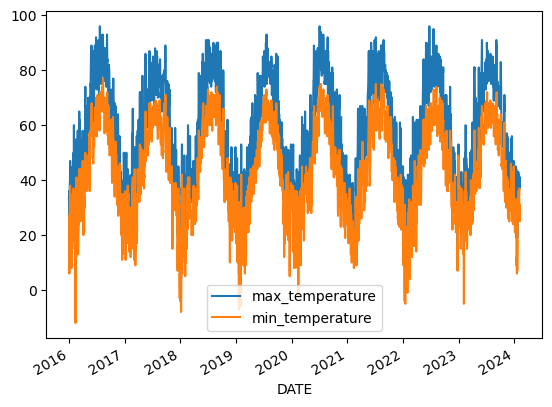

In [20]:
core_weather[["max_temperature", "min_temperature"]].plot()

<Axes: xlabel='DATE'>

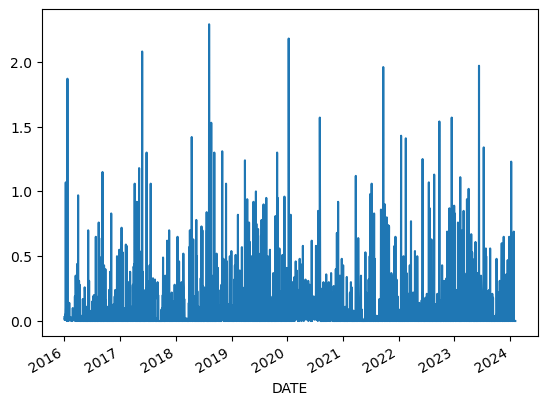

In [21]:
core_weather["precipitation"].plot()

# Training Machine Learning Model

In [22]:
core_weather["Target"] = core_weather.shift(-1)["max_temperature"]

In [23]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target
DATE,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0
2016-01-02,0.010,31.0,35.0,27.0,36.0
2016-01-03,0.010,25.0,36.0,14.0,14.0
2016-01-04,0.020,10.0,14.0,6.0,14.0
2016-01-05,0.017,10.0,14.0,8.0,36.0
...,...,...,...,...,...
2024-02-01,0.000,39.0,41.0,37.0,41.0
2024-02-02,0.000,35.0,41.0,29.0,37.0
2024-02-03,0.000,32.0,37.0,27.0,41.0


In [24]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target
DATE,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0
2016-01-02,0.010,31.0,35.0,27.0,36.0
2016-01-03,0.010,25.0,36.0,14.0,14.0
2016-01-04,0.020,10.0,14.0,6.0,14.0
2016-01-05,0.017,10.0,14.0,8.0,36.0
...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0
2024-02-01,0.000,39.0,41.0,37.0,41.0
2024-02-02,0.000,35.0,41.0,29.0,37.0


In [25]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [26]:
predictors = ["precipitation", "max_temperature", "min_temperature","avg_temperature"]

In [27]:
train = core_weather.loc[:"2023-10-31"]
test = core_weather.loc["2023-11-1":]

In [28]:
reg.fit(train[predictors], train["Target"])

Ridge(alpha=0.1)

In [29]:
predictions = reg.predict(test[predictors])

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["Target"],predictions)

5.12150012042162

## Evaluating Our Model

In [31]:
combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns= ["Actual","predictions"]
combined

,Actual,predictions
DATE,,
2023-11-01,48.0,44.286289
2023-11-02,57.0,49.701211
2023-11-03,53.0,59.192506
2023-11-04,51.0,56.200996
2023-11-05,54.0,52.301579
...,...,...
2024-01-31,41.0,46.143170
2024-02-01,41.0,46.077862
2024-02-02,37.0,42.364102


<Axes: xlabel='DATE'>

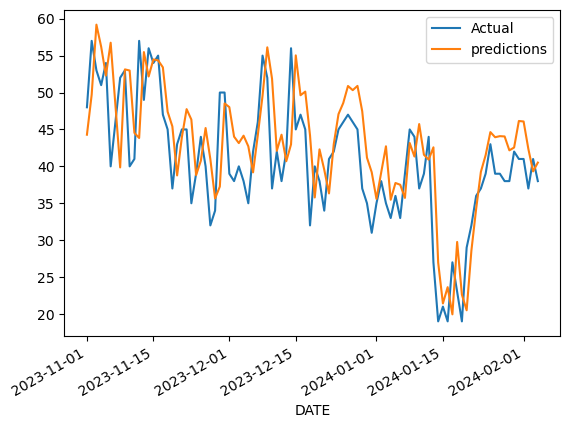

In [32]:
combined.plot()

In [33]:
reg.coef_

array([-4.07292713,  0.61287258,  0.5475649 , -0.16668973])

## Creating function to make Predictions 

In [34]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2023-10-31"]
    test = core_weather.loc["2023-11-1":]
    reg.fit(train[predictors],train["Target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["Target"],predictions)
    combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns= ["Actual","predictions"]
    return error, combined

# Adding in rolling means

In [35]:
core_weather["month_max"] = core_weather["max_temperature"].rolling(30).mean()

In [36]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max
DATE,,,,,,
2016-01-01,0.030,30.0,33.0,27.0,35.0,NaN
2016-01-02,0.010,31.0,35.0,27.0,36.0,NaN
2016-01-03,0.010,25.0,36.0,14.0,14.0,NaN
2016-01-04,0.020,10.0,14.0,6.0,14.0,NaN
2016-01-05,0.017,10.0,14.0,8.0,36.0,NaN
...,...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0,34.166667
2024-02-01,0.000,39.0,41.0,37.0,41.0,34.366667
2024-02-02,0.000,35.0,41.0,29.0,37.0,34.466667


In [37]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["max_temperature"]

In [38]:
core_weather = core_weather.iloc[30:,:].copy()

In [39]:
core_weather.corr()["Target"]

precipitation     -0.025144
avg_temperature    0.935151
max_temperature    0.929416
min_temperature    0.921988
Target             1.000000
month_max          0.874659
month_day_max     -0.325075
Name: Target, dtype: float64

In [40]:
predictors = ["precipitation", "max_temperature", "min_temperature","avg_temperature","month_max","month_day_max"]

In [41]:
core_weather.apply(lambda x: (x==9999).sum())

precipitation      0
avg_temperature    0
max_temperature    0
min_temperature    0
Target             0
month_max          0
month_day_max      0
dtype: int64

In [42]:
core_weather.apply(pd.isnull).sum()

precipitation      0
avg_temperature    0
max_temperature    0
min_temperature    0
Target             0
month_max          0
month_day_max      0
dtype: int64

In [43]:
core_weather.describe()

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max,month_day_max
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000
mean,0.085905,50.353671,57.259221,43.435712,57.255084,57.248443,1.042846
std,0.213554,18.167507,19.383170,17.321317,19.386000,17.683863,0.294921
min,0.000000,-3.000000,4.000000,-12.000000,4.000000,23.800000,0.476730
25%,0.000000,36.000000,41.000000,31.000000,41.000000,40.233333,0.911667
50%,0.000000,50.000000,57.000000,43.000000,57.000000,56.066667,1.008017
75%,0.050000,67.000000,75.000000,59.000000,75.000000,75.066667,1.115238
max,2.290000,85.000000,96.000000,77.000000,96.000000,86.500000,5.983333


In [44]:
error,combined = create_predictions(predictors, core_weather, reg)

In [45]:
error

4.63220847041594

<Axes: xlabel='DATE'>

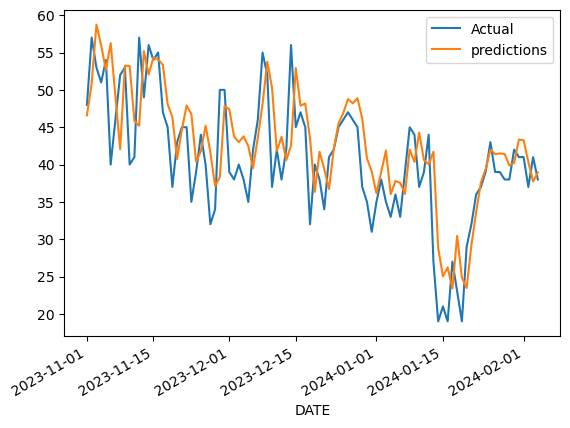

In [46]:
combined.plot()

In [47]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max,month_day_max
DATE,,,,,,,
2016-01-31,0.017,44.0,50.0,37.0,50.0,33.300000,0.666000
2016-02-01,0.017,43.0,50.0,35.0,37.0,33.800000,0.676000
2016-02-02,0.140,35.0,37.0,33.0,60.0,33.833333,0.914414
2016-02-03,0.017,48.0,60.0,36.0,40.0,35.366667,0.589444
2016-02-04,0.017,36.0,40.0,31.0,36.0,36.233333,0.905833
...,...,...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0,34.166667,0.813492
2024-02-01,0.000,39.0,41.0,37.0,41.0,34.366667,0.838211
2024-02-02,0.000,35.0,41.0,29.0,37.0,34.466667,0.840650


In [48]:
monthly_avg = core_weather["max_temperature"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [49]:
print(monthly_avg)

DATE  DATE      
1     2016-01-31    50.000000
      2017-01-01    44.000000
      2017-01-02    43.333333
      2017-01-03    42.750000
      2017-01-04    42.000000
                      ...    
12    2023-12-27    37.727273
      2023-12-28    37.761317
      2023-12-29    37.790984
      2023-12-30    37.787755
      2023-12-31    37.776423
Name: max_temperature, Length: 2901, dtype: float64


In [50]:
monthly_avg.index

MultiIndex([( 1, '2016-01-31'),
            ( 1, '2017-01-01'),
            ( 1, '2017-01-02'),
            ( 1, '2017-01-03'),
            ( 1, '2017-01-04'),
            ( 1, '2017-01-05'),
            ( 1, '2017-01-06'),
            ( 1, '2017-01-07'),
            ( 1, '2017-01-08'),
            ( 1, '2017-01-09'),
            ...
            (12, '2023-12-22'),
            (12, '2023-12-23'),
            (12, '2023-12-24'),
            (12, '2023-12-25'),
            (12, '2023-12-26'),
            (12, '2023-12-27'),
            (12, '2023-12-28'),
            (12, '2023-12-29'),
            (12, '2023-12-30'),
            (12, '2023-12-31')],
           names=['DATE', 'DATE'], length=2901)

In [51]:
monthly_avg.index = pd.to_datetime(monthly_avg.index.get_level_values(1))

In [52]:
monthly_avg = monthly_avg.reindex(core_weather.index)

In [53]:
core_weather["Monthly_avg"] = monthly_avg

In [54]:
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max,month_day_max,Monthly_avg
DATE,,,,,,,,
2016-01-31,0.017,44.0,50.0,37.0,50.0,33.300000,0.666000,50.000000
2016-02-01,0.017,43.0,50.0,35.0,37.0,33.800000,0.676000,50.000000
2016-02-02,0.140,35.0,37.0,33.0,60.0,33.833333,0.914414,43.500000
2016-02-03,0.017,48.0,60.0,36.0,40.0,35.366667,0.589444,49.000000
2016-02-04,0.017,36.0,40.0,31.0,36.0,36.233333,0.905833,46.750000
...,...,...,...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0,34.166667,0.813492,33.084337
2024-02-01,0.000,39.0,41.0,37.0,41.0,34.366667,0.838211,35.648889
2024-02-02,0.000,35.0,41.0,29.0,37.0,34.466667,0.840650,35.672566


In [55]:
day_of_year_avg = core_weather["max_temperature"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [56]:
print(day_of_year_avg)

DATE  DATE      
1     2017-01-01    38.000000
      2018-01-01    28.000000
      2019-01-01    33.000000
      2020-01-01    33.250000
      2021-01-01    33.800000
                      ...    
365   2021-12-31    34.833333
      2022-12-31    37.142857
      2023-12-31    36.875000
366   2016-12-31    34.000000
      2020-12-31    35.000000
Name: max_temperature, Length: 2901, dtype: float64


In [57]:
day_of_year_avg.index = pd.to_datetime(day_of_year_avg.index.get_level_values(1))

In [58]:
day_of_year_avg = day_of_year_avg.reindex(core_weather.index)

In [59]:
core_weather["Day_of_year_avg"] = day_of_year_avg
core_weather

,precipitation,avg_temperature,max_temperature,min_temperature,Target,month_max,month_day_max,Monthly_avg,Day_of_year_avg
DATE,,,,,,,,,
2016-01-31,0.017,44.0,50.0,37.0,50.0,33.300000,0.666000,50.000000,50.000000
2016-02-01,0.017,43.0,50.0,35.0,37.0,33.800000,0.676000,50.000000,50.000000
2016-02-02,0.140,35.0,37.0,33.0,60.0,33.833333,0.914414,43.500000,37.000000
2016-02-03,0.017,48.0,60.0,36.0,40.0,35.366667,0.589444,49.000000,60.000000
2016-02-04,0.017,36.0,40.0,31.0,36.0,36.233333,0.905833,46.750000,40.000000
...,...,...,...,...,...,...,...,...,...
2024-01-31,0.000,39.0,42.0,36.0,41.0,34.166667,0.813492,33.084337,31.111111
2024-02-01,0.000,39.0,41.0,37.0,41.0,34.366667,0.838211,35.648889,35.111111
2024-02-02,0.000,35.0,41.0,29.0,37.0,34.466667,0.840650,35.672566,33.777778


In [60]:
predictors = ["precipitation", "max_temperature", "min_temperature","avg_temperature","month_max","month_day_max", "Day_of_year_avg", "Monthly_avg"]

In [61]:
error,combined = create_predictions(predictors, core_weather, reg)

In [62]:
error

4.208115875402749

<Axes: xlabel='DATE'>

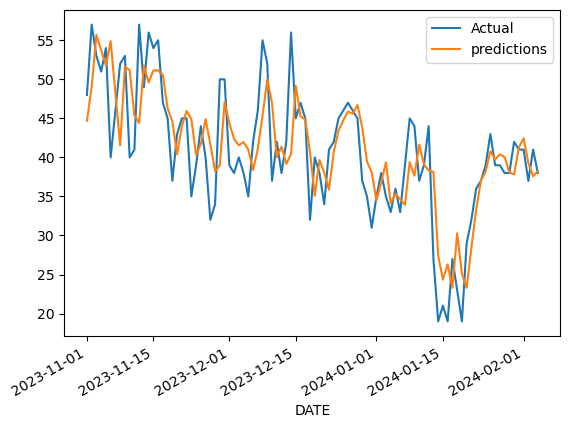

In [63]:
combined.plot()

In [64]:
reg.coef_

array([-3.63701689,  0.43387394,  0.41041823, -0.09043151, -0.07837964,
        2.1315727 ,  0.16589817,  0.18923151])

In [65]:
core_weather.corr()["Target"]

precipitation     -0.025144
avg_temperature    0.935151
max_temperature    0.929416
min_temperature    0.921988
Target             1.000000
month_max          0.874659
month_day_max     -0.325075
Monthly_avg        0.893221
Day_of_year_avg    0.915256
Name: Target, dtype: float64

In [66]:
combined["diff"] =  (combined["Actual"] - combined["predictions"]).abs()

In [67]:
combined.sort_values("diff", ascending=False).head()

,Actual,predictions,diff
DATE,,,
2023-12-14,56.0,40.404199,15.595801
2023-11-06,40.0,54.894959,14.894959
2023-11-12,57.0,44.389760,12.610240
2023-11-10,40.0,51.194974,11.194974
2024-01-13,27.0,38.147993,11.147993


In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
actual_values = combined["Actual"]
predicted_values = combined["predictions"]

In [70]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, predicted_values)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 29.35841777115161
Root Mean Squared Error (RMSE): 5.418340868859361
R-squared (R2): 0.580627223196196
